# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib as plot
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders= pd.read_csv('/datasets/instacart_orders.csv',sep= ';')
products= pd.read_csv('/datasets/products.csv',sep= ';')
aisles= pd.read_csv('/datasets/aisles.csv',sep= ';')
departments= pd.read_csv('/datasets/departments.csv',sep= ';')
order_products= pd.read_csv('/datasets/order_products.csv',sep= ';')


In [3]:
# mostrar información del DataFrame
print(instacart_orders.head())
print(instacart_orders.info())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [4]:
# mostrar información del DataFrame
print(products.head())
print(products.info())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
N

In [5]:
# mostrar información del DataFrame
print(aisles.head())
print(aisles.info())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
# mostrar información del DataFrame
print(departments.head())
print(departments.info())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
# mostrar información del DataFrame
print(order_products.head())
print(order_products.info(null_counts=True))

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
En 3 de los 5 data frames hay datos nulos o ausentes, y son tanto de tipo categorical(object) y float. 

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
El plan va consitir en limpiar cada dataset por separado, en cada uno se verificaran que los tipos de datos sean coherentes con los datos, e identificar y completar valores ausentes, así como identificar y liminar valores duplicados. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(instacart_orders.duplicated().sum())
print(instacart_orders[instacart_orders.duplicated()])

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? Tienen en común que son todos del día 3 o sea miércoles a las 2am

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

filtered_instacart_orders= instacart_orders[(instacart_orders['order_dow']==3) & (instacart_orders['order_hour_of_day']==2)]
print(filtered_instacart_orders)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? que hay 15 duplicados en 121 resultados 

In [10]:
# Elimina los pedidos duplicados
instacart_orders=instacart_orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(instacart_orders[instacart_orders['order_id'].duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos: se encontró que los duplicados cumplian un patron y los eliminamos

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())
print(products[products.duplicated()])

0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Verifica si hay IDs duplicadas de productos
print(products[products['product_id'].duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products[products['product_name'].duplicated()])

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products[products['product_name'].duplicated() & products['product_name'].notna()])

       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Describe brevemente tus hallazgos y lo que hiciste con ellos: descubrimos que no había filas completas duplicadas ni id de productos duplicadas pero sí hay nombres de productos duplicados lo cual puede deberse a un error al momento de capturar los datos y sería bueno preguntar si tienen algún nombre diferente para esos productos. 

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())
print(departments[departments.duplicated()])

0
Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
# Revisa si hay IDs duplicadas de productos
print(departments[departments['department_id'].duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos: el dataframe en cuestión no tiene duplicados, de momento no se hace nada más 

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())
print(aisles[aisles.duplicated()])

0
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [20]:
# Revisa si hay IDs duplicadas de productos
print(aisles[aisles['aisle_id'].duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos: el dataframe en cuestión no tiene duplicados, de momento no se hace nada más 

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())
print(order_products[order_products.duplicated()])

0
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products[order_products['order_id'].duplicated()])
print(order_products[order_products['product_id'].duplicated()])
print(order_products[order_products['add_to_cart_order'].duplicated()])
print(order_products[order_products['reordered'].duplicated()])

         order_id  product_id  add_to_cart_order  reordered
367       2867619       48094                9.0          0
824        844425       39408               10.0          1
1124      3319857       37067               19.0          0
1258      1038788       12471               14.0          0
1303      2825714       44632               16.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4094961 rows x 4 columns]
         order_id  product_id  add_to_cart_order  reordered
19        2500729       21616                5.0          1
20        1687771       22963                5.0          1
75        2186234       13176                2.0          1
78         1

Describe brevemente tus hallazgos y lo que hiciste con ellos: el data frame no tiene filas completas duplicadas. Sin embargo tiene valores duplicados en sus 4 columnas, en este caso hace sentido ya que cada fila es un producto que tiene tanto un product_id como order_id y precismente podria formar parte de una orden con varios productos y varias ordenes podrian tener productos iguales entre sí. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products['product_name'].value_counts(dropna=False))
print(products[products['product_name'].isna()])

NaN                                   1258
GREEN TEA WITH GINSENG AND HONEY         3
CONCENTRACE TRACE MINERAL DROPS          2
DULCE DE LECHE CARAMEL ICE CREAM         2
BLEU CHEESE SALAD DRESSING AND DIP       2
                                      ... 
BUTTER BISCUITS                          1
TROPICAL FLAVORED FRUIT SNACKS           1
ORIGINAL POWDER LAUNDRY DETERGENT        1
PIQUILLO ROASTED PEPPERS                 1
FIBER                                    1
Name: product_name, Length: 48333, dtype: int64
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN 

Describe brevemente cuáles son tus hallazgos: hay 1,258 valores ausentes en la columna product_name, en la muestra parece ser que todos vienen del departamento 21 y de el pasillo 100. 

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[products['aisle_id']==100])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos: la cuenta es la misma 1,258, parece que todos los nan vienen del pasillo 100 

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[products['department_id']==21])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos: la cuenta vuelve a coincidir en 1258 para los 3 filtros. 

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments[departments['department_id']==21])
print(aisles[aisles['aisle_id']==100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos: el dato del departamento 21 y del pasillo 100, estan missing, no son nulos solo no se sabe cuáles sean. 

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products['product_name'].value_counts(dropna=False))
print(products[products['product_name'].isna()])

Unknown                                1258
GREEN TEA WITH GINSENG AND HONEY          3
ORIGINAL PANCAKE & WAFFLE MIX             2
BLEU CHEESE SALAD DRESSING AND DIP        2
DULCE DE LECHE CARAMEL ICE CREAM          2
                                       ... 
TROPICAL FLAVORED FRUIT SNACKS            1
ORIGINAL POWDER LAUNDRY DETERGENT         1
PIQUILLO ROASTED PEPPERS                  1
MACADAMIA OIL HYDRATING CONDITIONER       1
FIBER                                     1
Name: product_name, Length: 48333, dtype: int64
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos: Verificamos cual podria ser la cause de los nulos en la variable categorica y al final los sustituimos por 'Unknown'

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())
print(instacart_orders[instacart_orders.isna().any(axis=1)])

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4               

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart_orders[instacart_orders['order_number']==1])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos: Todos los nulos corresponden al primero pedido del cliente en la columna days_since_prior_order, lo cual aquí simplemente no aplica por ser la primera orden y los nan son precismente esa info.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(order_products.isna().sum())
print(order_products[order_products.isna().any(axis=1)])

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos: hay valores ausentes en la columna add_to_cart_order, los valores minimos y máximos nos indican que hay ordenes con 1 producto hasta ordenes con 64 productos

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ID_orders_null_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]
print(ID_orders_null_add_to_cart)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

ID_orders_null_add_to_cart_grouped = ID_orders_null_add_to_cart.groupby('order_id')['product_id'].count()
print(ID_orders_null_add_to_cart_grouped)
print("Valor mínimo de productos por pedido:", ID_orders_null_add_to_cart_grouped.min())

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64
Valor mínimo de productos por pedido: 1


Describe brevemente cuáles son tus hallazgos: la respuesta breve es que no, no todos los pedidos con valores ausentes tienen 64 productos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(order_products.isna().sum())
print(order_products[order_products.isna().any(axis=1)])
print(order_products.info(null_counts=True))

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos: exploramos los nulos de la columna add_to_cart_order y los llenamos con 999, y convertimos la columna a entero 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos: Realizar este proceso es importante ya que ayuda a que los resultados del análisis sean precisos y valiosos, así mismo hay que estar muy atento a los posibles problemas de la data ya que no simpre es tan obvio como reemplazar por 'unknown' o rellenear variables cuantitativas, hay que explorar los datasets y ver que necesitan y que problems presentan. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(instacart_orders['order_hour_of_day'].min())
print(instacart_orders['order_hour_of_day'].max())

0
23


In [36]:
print(instacart_orders['order_dow'].min())
print(instacart_orders['order_dow'].max())

0
6


Escribe aquí tus conclusiones: ambas variables son sensibles y razonables 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

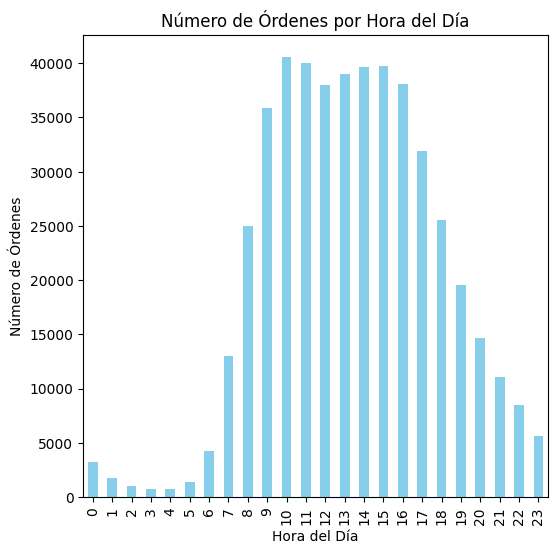

In [37]:
orders_per_hour = instacart_orders.groupby('order_hour_of_day')['order_id'].count()


orders_per_hour.plot(kind='bar', figsize=(6, 6), color='skyblue')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Órdenes')
plt.title('Número de Órdenes por Hora del Día')
plt.show()

Escribe aquí tus conclusiones: podemos ver que las horas en las que más compra la gente estan en un rango de 9am a 4pm

### [A3] ¿Qué día de la semana compran víveres las personas?

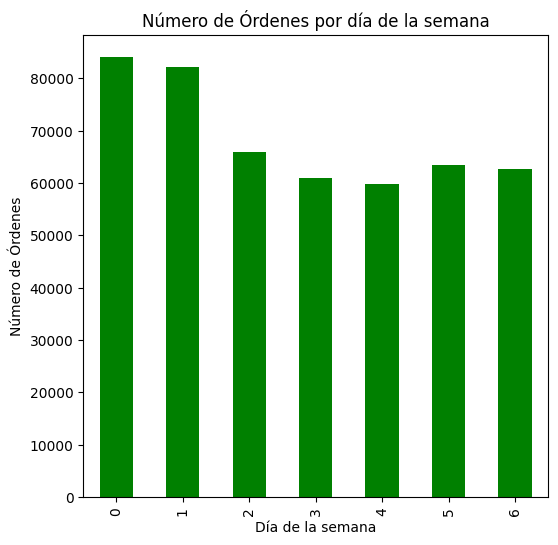

In [38]:
orders_per_day = instacart_orders.groupby('order_dow')['order_id'].count()

orders_per_day.plot(kind='bar', figsize=(6, 6), color='green')
plt.xlabel('Día de la semana')
plt.ylabel('Número de Órdenes')
plt.title('Número de Órdenes por día de la semana')
plt.show()


Escribe aquí tus conclusiones: podemos ver que los días domingo y lunes son en los que más compra la gente, y se mantiene parejo en el resto de la semana

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

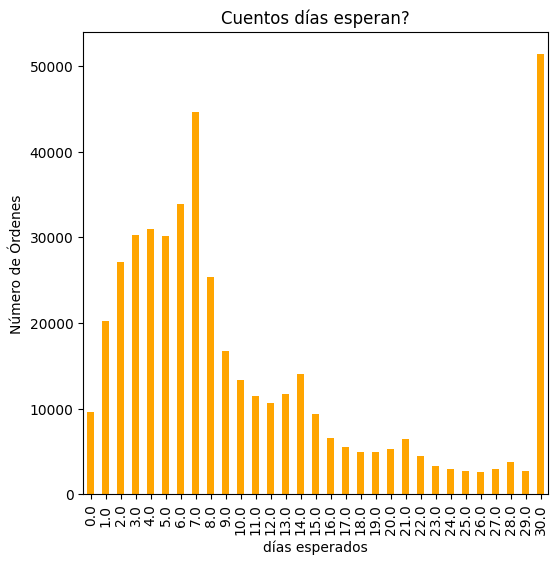

In [39]:
days_waited = instacart_orders.groupby('days_since_prior_order')['order_id'].count()

days_waited.plot(kind='bar', figsize=(6, 6), color='orange')
plt.xlabel('días esperados')
plt.ylabel('Número de Órdenes')
plt.title('Cuentos días esperan?')
plt.show()

Escribe aquí tus conclusiones: los clientes esperan entre 0 y 30 días para hacer sus compras, parece que una buena parte hace sus compras cada mes, y también destaca otro grupo que compra cada 7 días o semanalmente 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 6]

In [41]:
wednesday_counts = wednesday_orders.groupby('order_hour_of_day')['order_id'].count()
saturday_counts = saturday_orders.groupby('order_hour_of_day')['order_id'].count()

In [42]:
df_comparison = pd.DataFrame({
    'Miércoles': wednesday_counts,
    'Sábado': saturday_counts
})

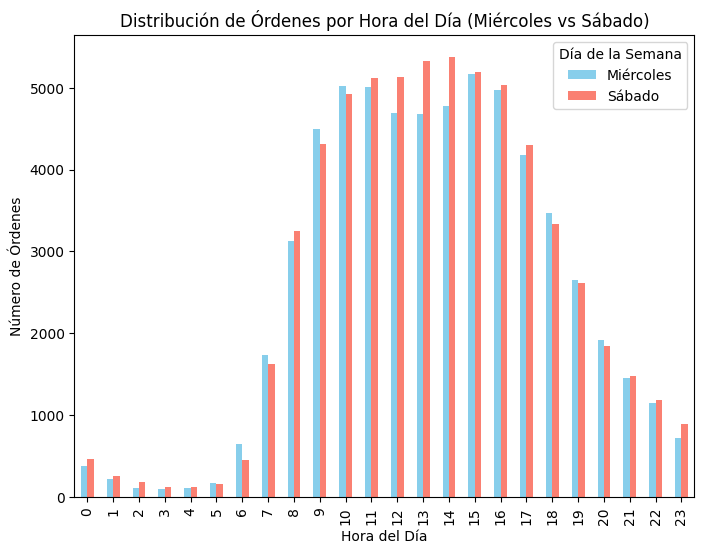

In [43]:
df_comparison.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.xlabel('Hora del Día')
plt.ylabel('Número de Órdenes')
plt.title('Distribución de Órdenes por Hora del Día (Miércoles vs Sábado)')
plt.legend(title='Día de la Semana')
plt.show()

Escribe aquí tus conclusiones: podemos ver que tienen tendencias muy similares, sin embargo podemos destcar que los miércoles de 6 a 10 am se vende más que los sábados a esas horas, de las 11 a las 17 los sábados venden más, destacando más de las 12 a las 14.  

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
orders_per_user = instacart_orders.groupby('user_id')['order_number'].max()

order_counts = orders_per_user.value_counts().sort_index()



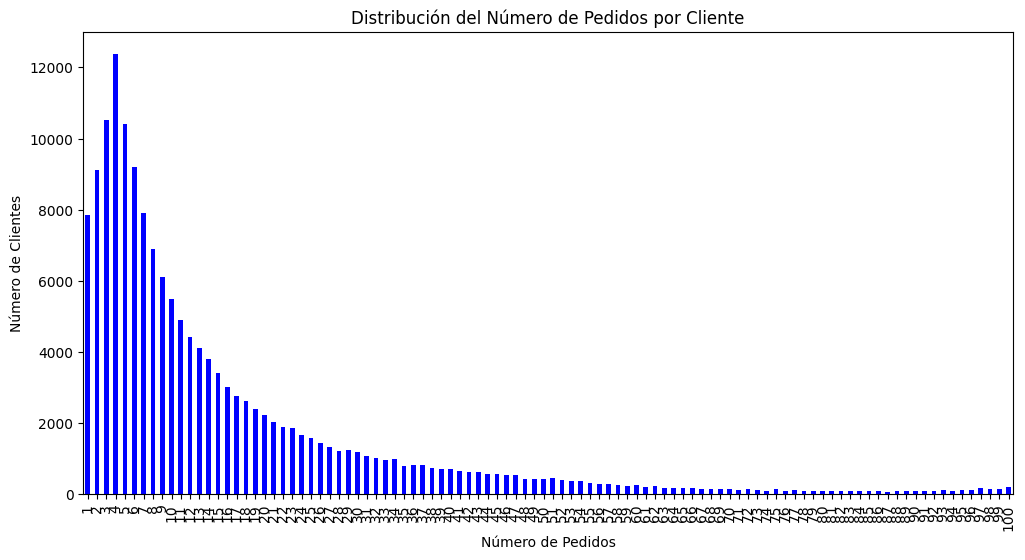

In [45]:
plt.figure(figsize=(12, 6))
order_counts.plot(kind='bar', color='blue')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.show()

Escribe aquí tus conclusiones: podemos ver que la mayoría de clientes hace entre 1 y 10 pedidos y de ahí baja considerablemente pero hay clientes que hacen hasta 100. y una buena porción hacen 4 pedidos. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
orders_with_products = instacart_orders.merge(order_products, on='order_id', how='inner')

merged_df = orders_with_products.merge(products, on='product_id', how='inner')


In [51]:
product_counts = merged_df.groupby(['product_id', 'product_name']).size().reset_index(name='count')

top_20_products = product_counts.sort_values(by='count', ascending=True).tail(20)

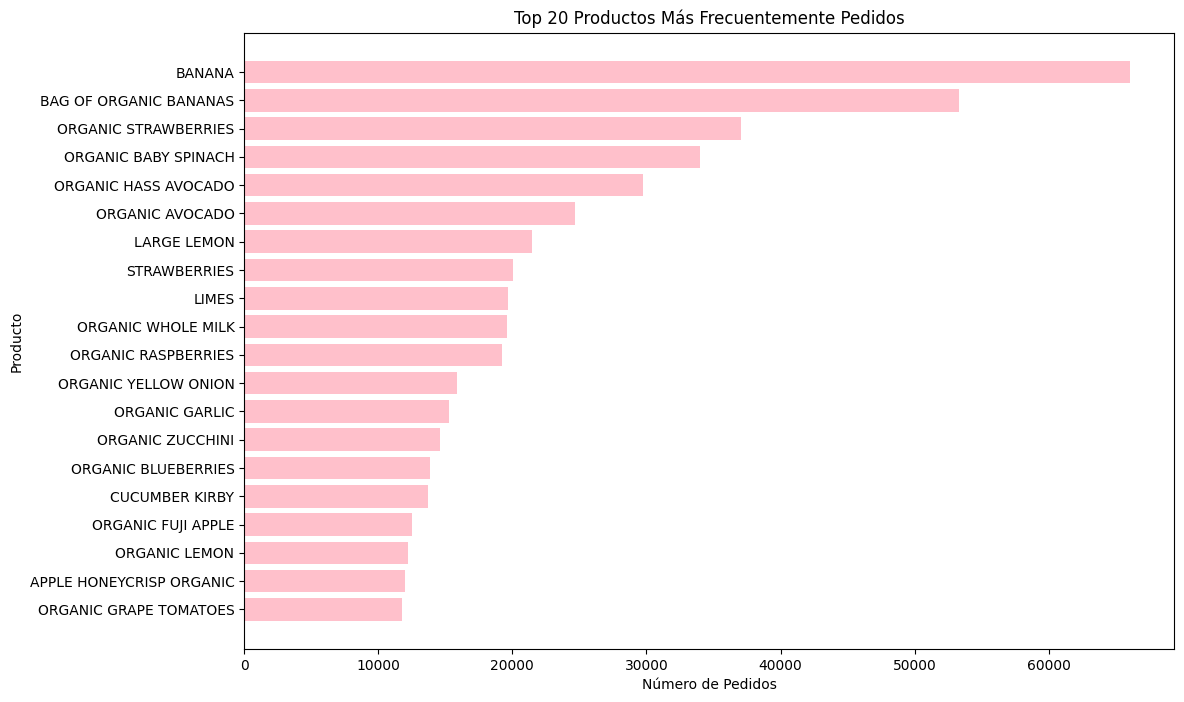

In [55]:
plt.figure(figsize=(12, 8))
plt.barh(top_20_products['product_name'], top_20_products['count'], color='pink')
plt.xlabel('Número de Pedidos')
plt.ylabel('Producto')
plt.title('Top 20 Productos Más Frecuentemente Pedidos')
plt.show()



Escribe aquí tus conclusiones: podemos observar que los 20 productos más vendidos son de caracter orgánico como frutas y verduras. Esto también nos ayuda a ver que productos debemos tener en stock y en que cantidad.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [59]:
items_per_order = order_products.groupby('order_id')['product_id'].count()
order_counts = items_per_order.value_counts().sort_index()

In [60]:
print(items_per_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


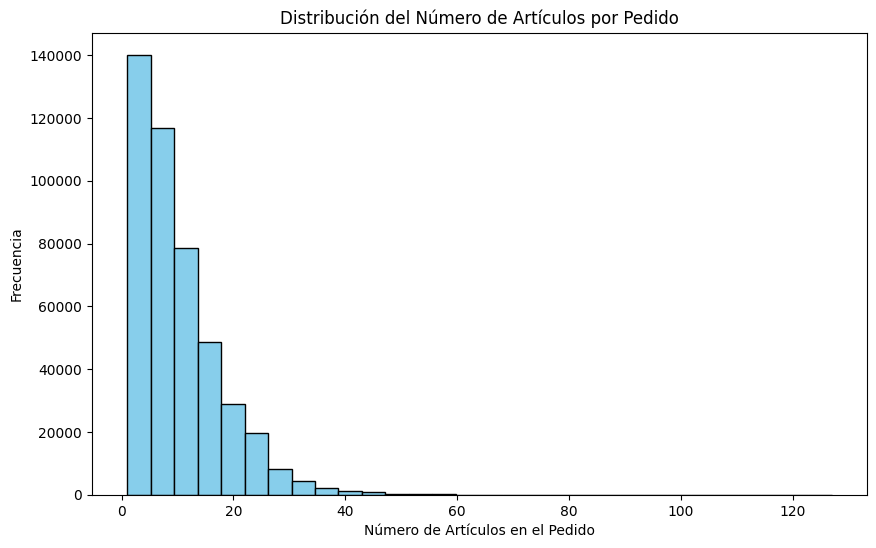

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Número de Artículos en el Pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Artículos por Pedido')
plt.show()


Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [63]:
reordered_products = order_products[order_products['reordered'] == 1]

In [64]:
reordered_counts = reordered_products['product_id'].value_counts().head(20)

In [66]:
top_20_reordered = pd.DataFrame({'product_id': reordered_counts.index, 'reorder_count': reordered_counts.values})
top_20_reordered = top_20_reordered.merge(products[['product_id', 'product_name']], on='product_id', how='left')
print(top_20_reordered[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    BANANA          55763
1        13176    BAG OF ORGANIC BANANAS          44450
2        21137      ORGANIC STRAWBERRIES          28639
3        21903      ORGANIC BABY SPINACH          26233
4        47209      ORGANIC HASS AVOCADO          23629
5        47766           ORGANIC AVOCADO          18743
6        27845        ORGANIC WHOLE MILK          16251
7        47626               LARGE LEMON          15044
8        27966       ORGANIC RASPBERRIES          14748
9        16797              STRAWBERRIES          13945
10       26209                     LIMES          13327
11       22935      ORGANIC YELLOW ONION          11145
12       24964            ORGANIC GARLIC          10411
13       45007          ORGANIC ZUCCHINI          10076
14       49683            CUCUMBER KIRBY           9538
15       28204        ORGANIC FUJI APPLE           8989
16        8277  APPLE HONEYCRISP ORGANIC        

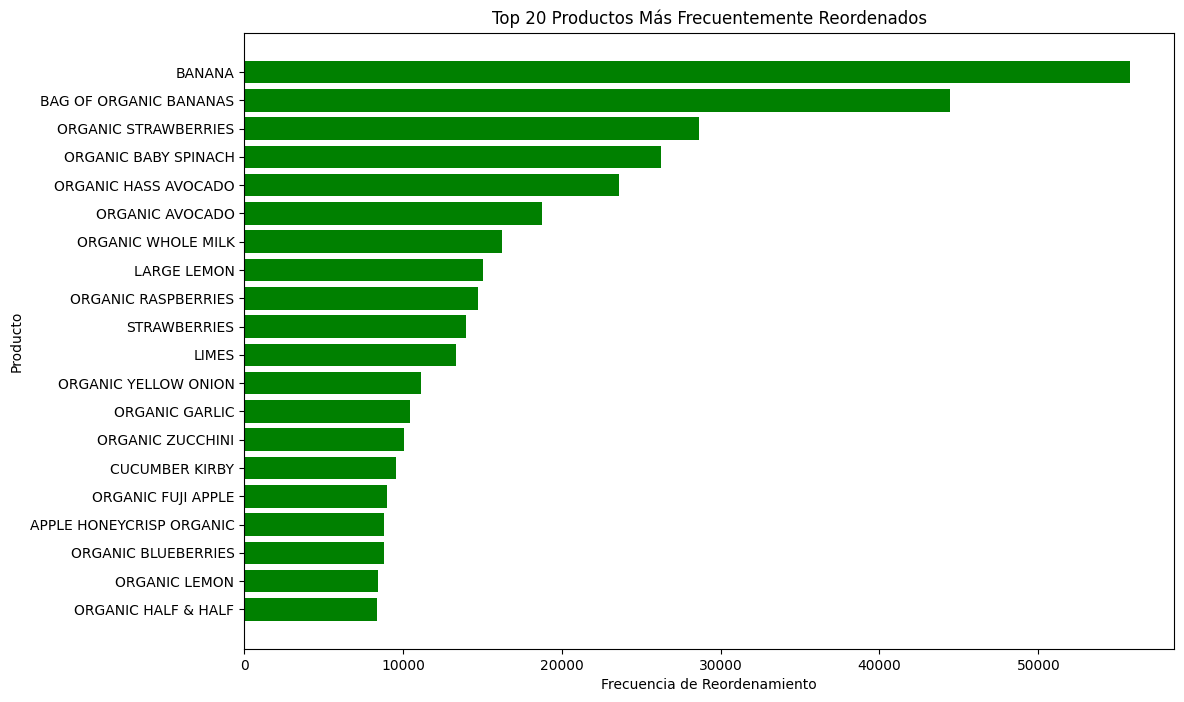

In [67]:
plt.figure(figsize=(12, 8))
plt.barh(top_20_reordered['product_name'], top_20_reordered['reorder_count'], color='green')
plt.xlabel('Frecuencia de Reordenamiento')
plt.ylabel('Producto')
plt.title('Top 20 Productos Más Frecuentemente Reordenados')
plt.gca().invert_yaxis()
plt.show()

Escribe aquí tus conclusiones: los productos concuerdan con los más pedidos en general o más populares. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [71]:
total_orders_per_product = order_products.groupby('product_id')['product_id'].count()
reorders_per_product = order_products[order_products['reordered'] == 1].groupby('product_id')['product_id'].count()
reorder_proportion = (reorders_per_product / total_orders_per_product).fillna(0)

In [72]:
reorder_proportion_df = reorder_proportion.reset_index(name='reorder_proportion')
reorder_proportion_df = reorder_proportion_df.merge(products[['product_id', 'product_name']], on='product_id', how='left')

top_20_reorder_proportion = reorder_proportion_df.sort_values(by='reorder_proportion', ascending=False).head(20)

print(top_20_reorder_proportion[['product_id', 'product_name', 'reorder_proportion']])

       product_id                                       product_name  \
13453       14721                            BONE STRENGTH TAKE CARE   
19195       20949                           VANILLA SANDWICH COOKIES   
6136         6723                                   PALMIERS- PETITE   
6144         6732                  NATURALLY SPARKLING MINERAL WATER   
41319       45088  CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...   
41310       45078                                       POMEGRANATEA   
19258       21016       PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS   
19248       21005                        PEANUT BUTTER PIE ICE CREAM   
32273       35192                         CHOCOLATE SOY MILK SINGLES   
32277       35197  MOCHA CHOCOLATE CHIP  ORGANIC NON-DAIRY FROZEN...   
6211         6810                        RASPBERRY GOJI PALEO PRINTS   
41274       45040                                 HEAD LOCK MEGA GEL   
41269       45035                               COFFEE FLAVOR YO

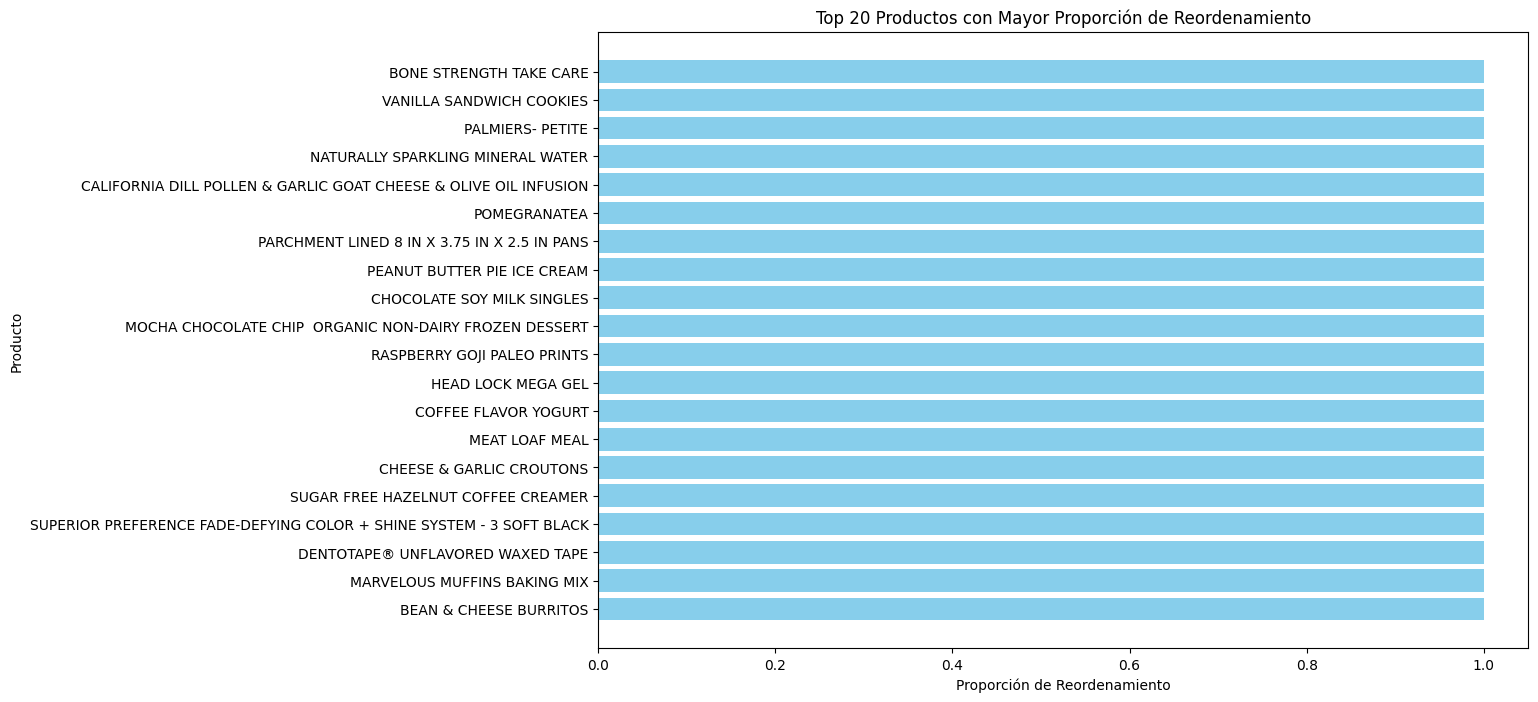

In [73]:
plt.figure(figsize=(12, 8))
plt.barh(top_20_reorder_proportion['product_name'], top_20_reorder_proportion['reorder_proportion'], color='skyblue')
plt.xlabel('Proporción de Reordenamiento')
plt.ylabel('Producto')
plt.title('Top 20 Productos con Mayor Proporción de Reordenamiento')  
plt.show()

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [80]:
merged_df = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id', how='inner')
total_products_per_user = merged_df.groupby('user_id')['product_id'].count()
reorders_per_user = merged_df[merged_df['reordered'] == 1].groupby('user_id')['product_id'].count()
repeat_order_rate = (reorders_per_user / total_products_per_user).fillna(0)

repeat_order_rate_df = repeat_order_rate.reset_index(name='repeat_order_rate')

        user_id  repeat_order_rate
99672    137587                1.0
125732   173474                1.0
10138     13918                1.0
45067     62300                1.0
45074     62307                1.0
...         ...                ...
138474   190953                0.0
86539    119371                0.0
45695     63173                0.0
45689     63163                0.0
120146   165726                0.0

[149626 rows x 2 columns]


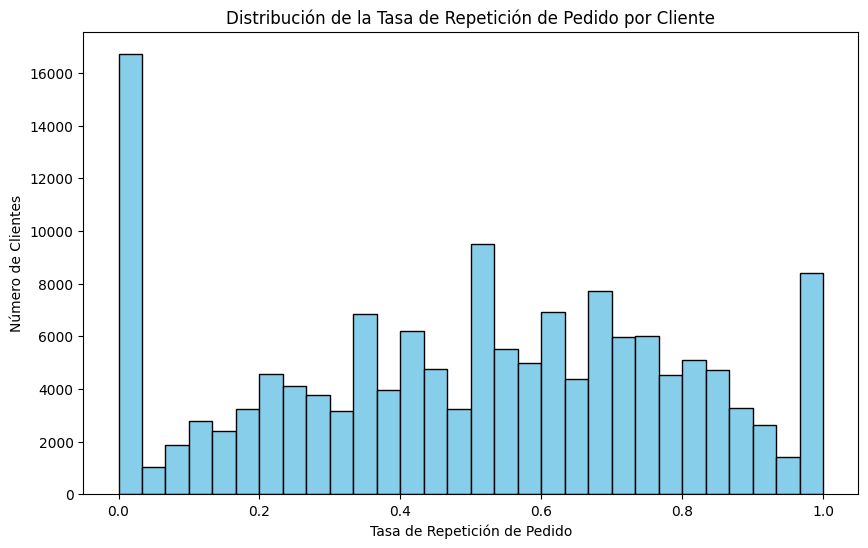

In [82]:
print(repeat_order_rate_df.sort_values(by='repeat_order_rate', ascending=False))
plt.figure(figsize=(10, 6))
plt.hist(repeat_order_rate_df['repeat_order_rate'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tasa de Repetición de Pedido')
plt.ylabel('Número de Clientes')
plt.title('Distribución de la Tasa de Repetición de Pedido por Cliente')
plt.show()


Escribe aquí tus conclusiones: tenemos practicamente dos grupos, los que no repiten, y los que repiten en una distribución de tasa más amplia. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [83]:
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]
first_in_cart_counts = first_in_cart['product_id'].value_counts().head(20)

In [84]:
top_20_first_in_cart = pd.DataFrame({
    'product_id': first_in_cart_counts.index,
    'first_in_cart_count': first_in_cart_counts.values
})
top_20_first_in_cart = top_20_first_in_cart.merge(products[['product_id', 'product_name']], on='product_id', how='left')

    product_id                 product_name  first_in_cart_count
0        24852                       BANANA                15562
1        13176       BAG OF ORGANIC BANANAS                11026
2        27845           ORGANIC WHOLE MILK                 4363
3        21137         ORGANIC STRAWBERRIES                 3946
4        47209         ORGANIC HASS AVOCADO                 3390
5        21903         ORGANIC BABY SPINACH                 3336
6        47766              ORGANIC AVOCADO                 3044
7        19660                 SPRING WATER                 2336
8        16797                 STRAWBERRIES                 2308
9        27966          ORGANIC RASPBERRIES                 2024
10       44632   SPARKLING WATER GRAPEFRUIT                 1914
11       49235          ORGANIC HALF & HALF                 1797
12       47626                  LARGE LEMON                 1737
13         196                         SODA                 1733
14       38689     ORGANI

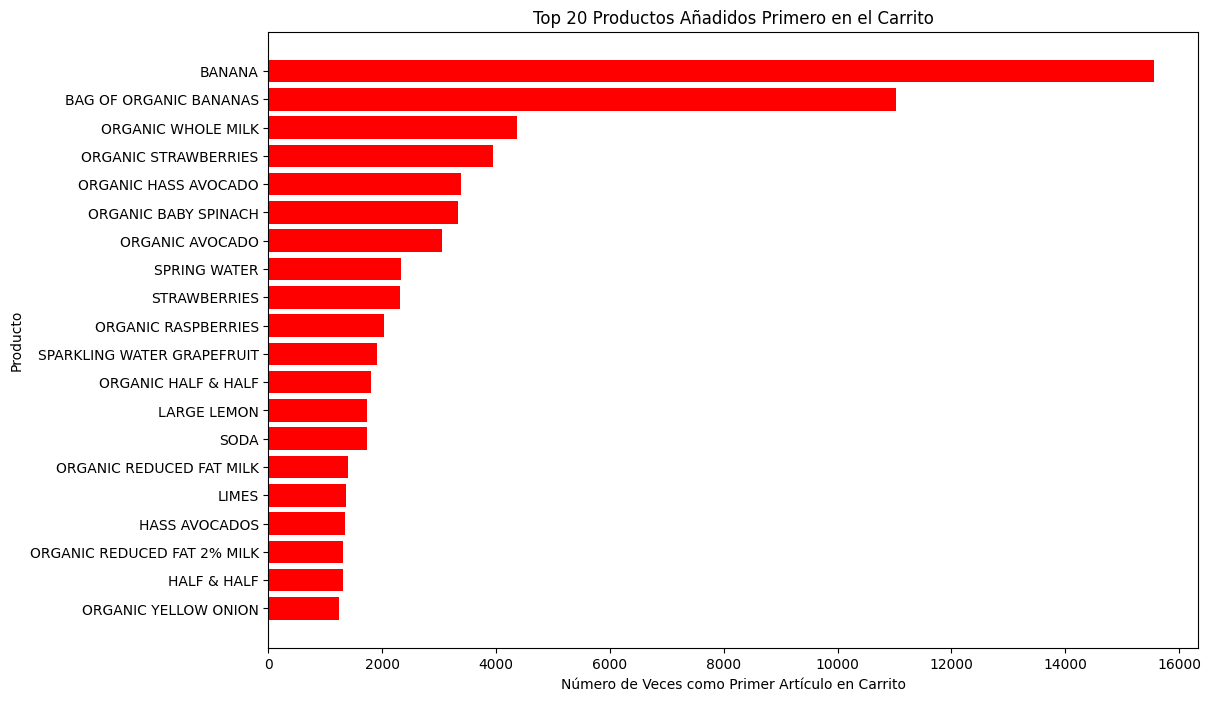

In [87]:
print(top_20_first_in_cart[['product_id', 'product_name', 'first_in_cart_count']])

plt.figure(figsize=(12, 8))
plt.barh(top_20_first_in_cart['product_name'], top_20_first_in_cart['first_in_cart_count'], color='red')
plt.xlabel('Número de Veces como Primer Artículo en Carrito')
plt.ylabel('Producto')
plt.title('Top 20 Productos Añadidos Primero en el Carrito')
plt.gca().invert_yaxis()  
plt.show()


Escribe aquí tus conclusiones: como pudimos comprobar con los demás análisis la banana es el producto estrella y el primero en ser agregado al carrito por muchos clientes, los demás productos cumplen con la tendencia de ser organicos. 

### Conclusion general del proyecto:

In [ ]:
## Personalmente me pareció muy desafiante pero eEn resumen, este análisis sobre los pedidos de Instacart nos da una idea bastante completa de cómo y cuándo compran los usuarios. Encontramos que los patrones de compra varían entre días de semana y fines de semana, lo cual puede ayudar a planificar inventarios y promociones. También vimos que algunos clientes son bastante frecuentes, mientras que otros hacen pedidos esporádicos; esto es clave para campañas de fidelización. Además, algunos productos se reordenan más que otros, lo cual revela artículos básicos que podrían destacarse en la plataforma. En cuanto a la tasa de repetición por cliente, ayuda a ver quiénes realmente están fieles a ciertos productos y se podría pensar en suscripciones o promociones dirigidas. Por último, los productos añadidos primero en el carrito nos dan pistas sobre qué es esencial para los usuarios y cómo mejorar la experiencia de compra destacando estos productos.